In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from numpy.fft import fft, ifft

# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [3]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [5]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [6]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [8]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [9]:
df=Normal_DP
Cavdf=Cavitation_DP


In [10]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [11]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

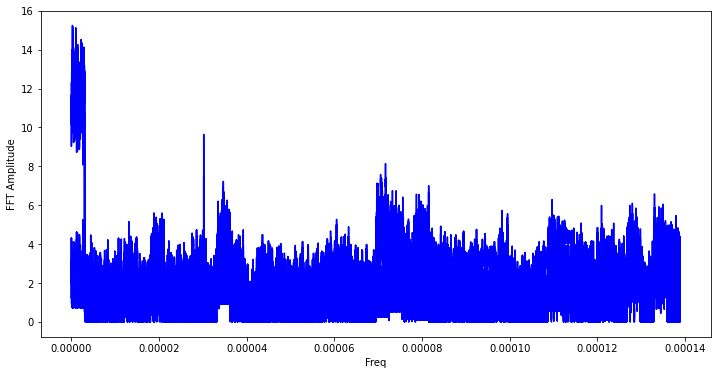

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [13]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

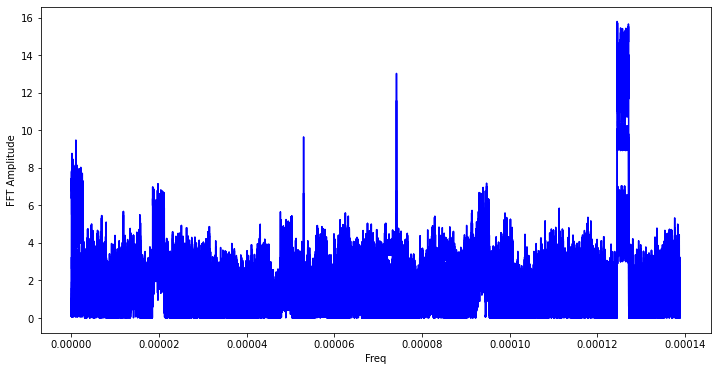

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [15]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [16]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])

In [17]:
X_Norm['Time ']=Normal_DPx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [18]:
X_cav['Time ']=Cavitation_DPx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391
...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805


In [19]:
X_train, X_test=train_test_split(X_Norm, test_size=0.3, random_state=1)


In [20]:
IF_DP = IsolationForest(random_state=1,contamination=0.05)
IF_DP.fit(X_train)

C:\Users\glowi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=1)

In [21]:
prediction= IF_DP.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 95.03%


In [22]:
prediction= IF_DP.predict(X_cav)
score =0
for f in range (0,X_cav.shape[0]): 
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_cav.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 93.51%


In [23]:
df_test=X_cav


In [24]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['prediction'] = prediction

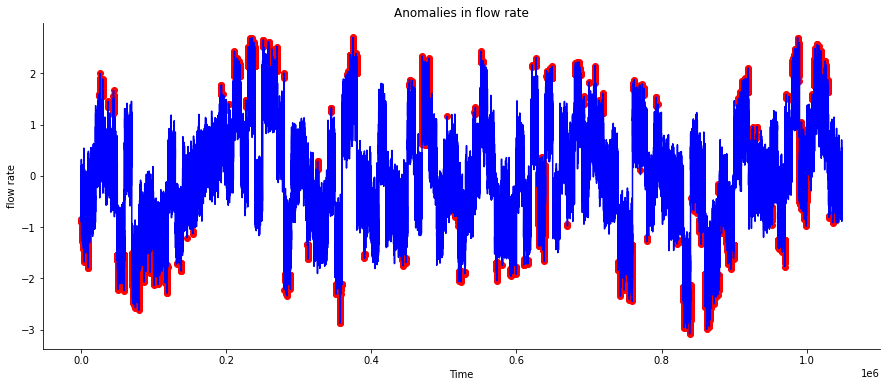

In [25]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

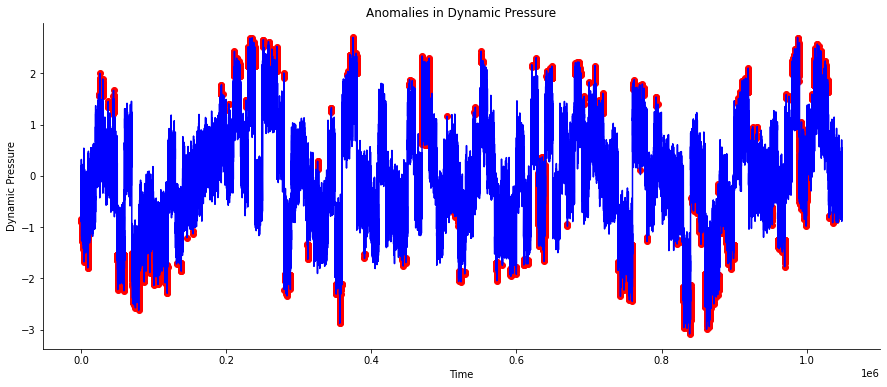

In [26]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Dynamic Pressure']] #anomaly

ax.plot(df_test.index, df_test['Dynamic Pressure'], color='blue')
ax.scatter(a.index, a['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

In [27]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

In [28]:
df_test_ANOMALY

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,prediction
419,4.828510,2.149931,-0.899306,-0.899306,2.149931,0.040918,1
424,4.896740,2.094732,-0.878222,-0.878222,2.094732,0.041406,1
429,4.988678,2.020353,-0.849811,-0.849811,2.020353,0.041895,1
887,4.846869,2.135078,-0.893633,-0.893633,2.135078,0.086621,1
890,4.621073,2.317751,-0.963408,-0.963408,2.317751,0.086914,1
...,...,...,...,...,...,...,...
1039981,-3.473533,2.815149,-0.763317,-0.763317,2.815149,101.560645,1
1039984,-3.518201,2.851286,-0.777120,-0.777120,2.851286,101.560937,1
1039986,-3.625823,2.938354,-0.810376,-0.810376,2.938354,101.561133,1
1039989,-3.796470,3.076411,-0.863109,-0.863109,3.076411,101.561426,1


# Vibration

In [29]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [30]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [31]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [32]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [33]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [34]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [35]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [36]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [37]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [38]:
Cavdf.shape

(1048576, 6)

In [39]:
Cavdf = pd.DataFrame(Cavdf)
Cavdf

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058
...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096


In [40]:
df = pd.DataFrame(df)
df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,5.931638,0.809176,-1.136223,0.683436,0.204239,5.906167
1,5.931638,0.809176,-1.136223,-0.465067,1.096988,5.906167
2,5.931638,0.809176,-1.136223,-0.531155,1.162432,5.906167
3,5.931638,0.809176,-1.136223,0.853546,0.580930,5.906167
4,5.931638,0.809176,-1.136223,-0.511034,-1.525184,5.906167
...,...,...,...,...,...,...
919995,0.439571,-0.955959,-1.698760,-1.393993,-1.079537,0.475558
919996,0.439571,-0.955959,-1.698760,0.761612,0.723953,0.475558
919997,0.439571,-0.955959,-1.698760,-0.229466,0.050897,0.475558
919998,0.439571,-0.955959,-1.698760,-0.933049,1.732465,0.475558


In [41]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

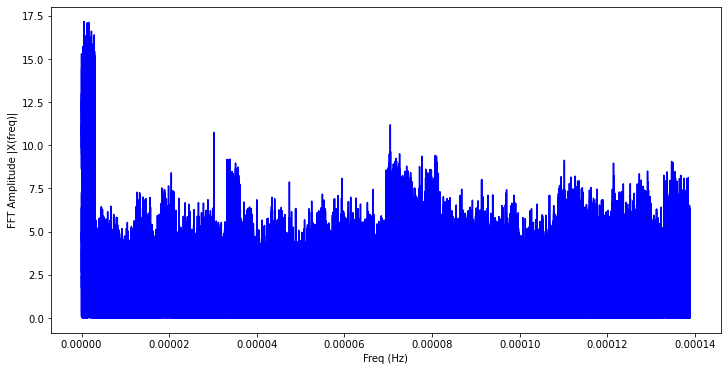

In [42]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [43]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

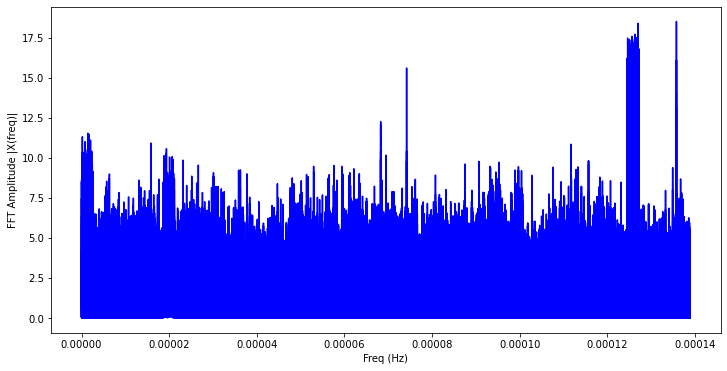

In [44]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [45]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [46]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [47]:
X_Norm['Time ']=Normal_Vibx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866,0.000000
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993,0.000098
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361,0.000195
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410,0.000293
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047,0.000391
...,...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512,89.843262
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837,89.843359
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768,89.843457
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567,89.843555


In [48]:
X_cav['Time ']=Cavitation_Vibx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [49]:
X_train, X_test=train_test_split(X_Norm, test_size=0.3, random_state=1)


In [50]:
IF_Vib = IsolationForest(random_state=1,contamination=0.05)
IF_Vib.fit(X_train)

C:\Users\glowi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=1)

In [51]:
prediction= IF_Vib.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 94.96%


In [52]:
X_cav

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [53]:
prediction= IF_Vib.predict(X_cav)
score =0
for f in range (0,X_cav.shape[0]): 
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_cav.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 94.25%


In [54]:
df_test=X_cav
df_test=pd.DataFrame(df_test)
df_test

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [55]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['prediction'] = prediction

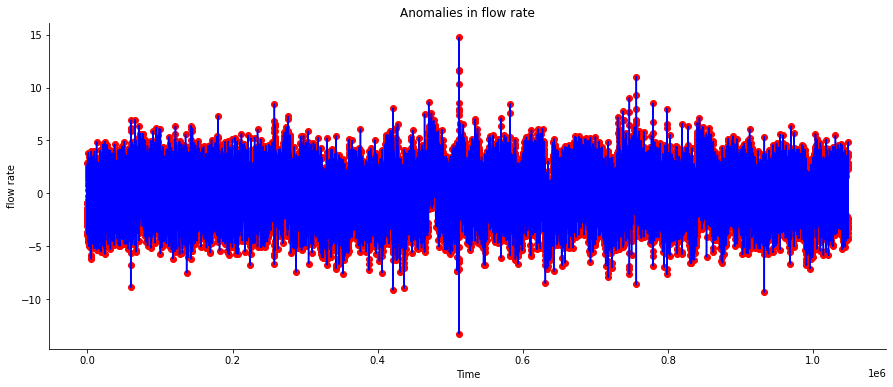

In [56]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

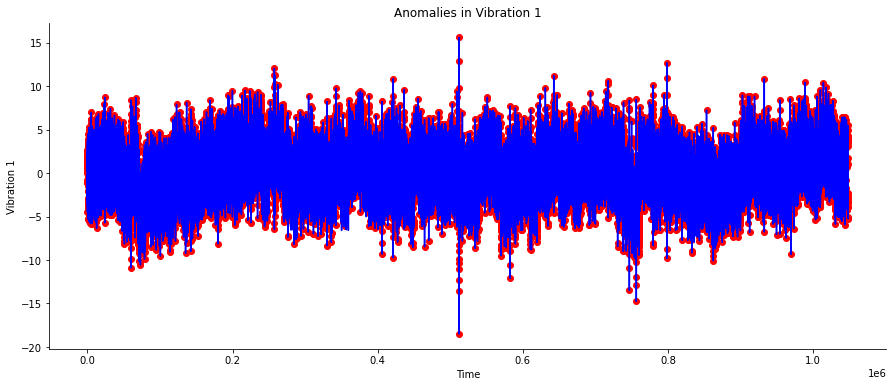

In [57]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 1']] #anomaly

ax.plot(df_test.index, df_test['Vibration 1'], color='blue')
ax.scatter(a.index, a['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

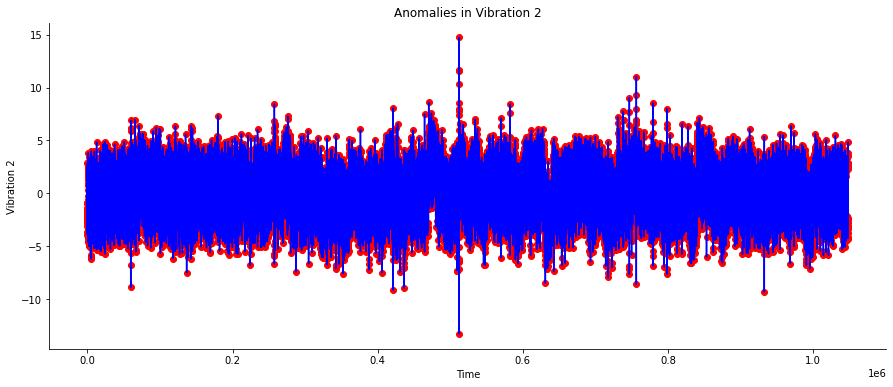

In [58]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 2']] #anomaly

ax.plot(df_test.index, df_test['Vibration 2'], color='blue')
ax.scatter(a.index, a['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

In [59]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

In [60]:
df_test_ANOMALY

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,prediction
9,6.497459,2.521662,-2.629375,2.513680,-2.629375,2.521662,0.000879,1
10,5.133500,3.071807,-1.551893,0.622383,-1.551893,3.071807,0.000977,1
11,3.442708,3.981075,-0.898112,-0.812922,-0.898112,3.981075,0.001074,1
21,5.337292,2.998897,-1.740747,0.942119,-1.740747,2.998897,0.002051,1
25,5.121775,3.362026,-2.399098,1.748081,-2.399098,3.362026,0.002441,1
...,...,...,...,...,...,...,...,...
1048449,0.855171,0.290929,-3.165453,4.147301,-3.165453,0.290929,102.387598,1
1048450,-4.450545,4.138832,-4.097729,3.621763,-4.097729,4.138832,102.387695,1
1048458,3.483556,-3.680640,3.492484,-3.853820,3.492484,-3.680640,102.388477,1
1048487,2.076120,-2.521283,2.829286,-3.438702,2.829286,-2.521283,102.391309,1
